# Deep Autoencoder Networks

High-dimensional data can be converted to low-dimensional codes by training a multilayer neural
network with a small central layer to reconstruct high-dimensional input vectors.
This kind of neural network is named *Autoencoder*.

Autoencoders is *nonlinear dimensionality reduction* technique ([Hinton et al, 2006](https://www.cs.toronto.edu/~hinton/science.pdf)) used for unsupervised learning of features, and they can
 learn low-dimensional codes that work much
better than principal components analysis as a tool to reduce the dimensionality of data.

## Anomaly Heart Beats Detection re-purposed for Med DNA

If enough training data
resembling some underlying pattern is provided, we can train the network to learn the patterns in the data.
An
anomalous test point is a point that does not match the typical data patterns. The autoencoder will
likely have a high error rate in reconstructing this data, indicating the anomaly.

This framework is used to develop an anomaly detection demonstration using a
deep autoencoder. The dataset is an ECG time series of heartbeats and the goal
is to determine which heartbeats are outliers. The training data (20 “good”
heartbeats) and the test data (training data with 3 “bad” heartbeats appended
for simplicity) can be downloaded directly into the H2O cluster, as shown below.
Each row represents a single heartbeat.

In [1]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,18 hours 4 mins
H2O cluster version:,3.11.0.99999
H2O cluster version age:,9 months and 8 days !!!
H2O cluster name:,ubuntu
H2O cluster total nodes:,1
H2O cluster free memory:,5.784 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
PATH = os.path.expanduser("~/h2o-3/")

In [3]:
train_dna_df = pd.read_csv('/home/ubuntu/train_mystalign.txt', sep='\t', usecols=range(4), header=None)

In [4]:
train_ecg = h2o.import_file("/home/ubuntu/train_mystalign.txt")
test_ecg = h2o.import_file("/home/ubuntu/test_mystalign.txt")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


let's explore the dataset.

In [33]:
# train_ecg.shape
train_dna_df.shape

# train_dna_df[0]
train_ecg.shape
# test_ecg.shape

(1109000, 12)

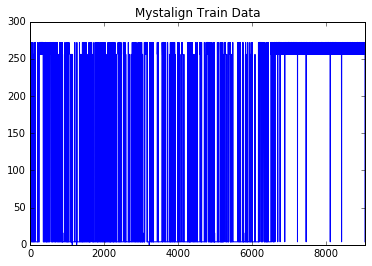

In [6]:
# transpose the frame to have the time serie as a single colum to plot
# train_ecg.as_data_frame().T.plot(legend=False, title="ECG Train Data", color='blue'); # don't display the legend
# test_ecg[1].as_data_frame().C2.plot(legend=False, title="ECG Train Data", color='blue');

# train_ecg.as_data_frame().C2.plot(legend=False, title="ECG Train Data", color='blue');
test_ecg.as_data_frame().C2.plot(legend=False, title="Mystalign Train Data", color='blue');

in the train data we have 20 time series each of 210 data points. Notice that all the lines are compact and follow a similar shape. Is important to remember that when training with autoencoders you want to use only VALID data. All the anomalies should be removed.

Now let's use the AutoEncoderEstimator to train our neural network

In [7]:
model = H2OAutoEncoderEstimator( 
        activation="Tanh", 
#         hidden=[50], 
        hidden=[100], 
        l1=1e-5,
        score_interval=0,
#         epochs=100
        epochs=50
)

model.train(x=train_ecg.names, training_frame=test_ecg)
# model.train(x=train_ecg.names, training_frame=train_ecg)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [8]:
model

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1503187461743_12
Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 2,868,973 weights/biases, 33.0 MB, 168,420 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,14273,Input,0.0,,,,,,,,,
,2,100,Tanh,0.0,1e-05,0.0,1.0042238,0.0000000,0.0,-0.0000052,0.0120354,0.0,0.0000000
,3,14273,Tanh,,1e-05,0.0,1.0042238,0.0000000,0.0,0.0000100,0.0120374,0.0,0.0000000




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.00046561170563
RMSE: 0.021578037576
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
,2017-08-20 18:09:33,7.538 sec,0.00000 obs/sec,0.0,0,0.0,0.0215780,0.0004656
,2017-08-20 18:10:52,1 min 26.267 sec,136 obs/sec,1.0806184,9,9785.0,0.2479695,0.0614889
,2017-08-20 18:12:11,2 min 45.565 sec,136 obs/sec,2.1603534,18,19562.0,0.4645455,0.2158025
,2017-08-20 18:13:32,4 min 6.329 sec,134 obs/sec,3.2315848,27,29262.0,0.1881630,0.0354053
,2017-08-20 18:14:51,5 min 24.673 sec,135 obs/sec,4.3045831,36,38978.0,0.9396151,0.8828766
,2017-08-20 18:16:06,6 min 39.747 sec,133 obs/sec,5.2606295,44,47635.0,0.2044175,0.0417865
,2017-08-20 18:17:18,7 min 51.729 sec,133 obs/sec,6.2055218,52,56191.0,0.3300861,0.1089568
,2017-08-20 18:18:30,9 min 3.659 sec,133 obs/sec,7.1473219,60,64719.0,0.2051132,0.0420714
,2017-08-20 18:19:42,10 min 15.935 sec,133 obs/sec,8.1021535,68,73365.0,0.6793915,0.4615728
,2017-08-20 18:21:01,11 min 34.688 sec,133 obs/sec,9.1617891,77,82960.0,0.2366512,0.0560038


Our Neural Network is now able to *Encode* the time series.

Now we try to Compute reconstruction error with the Anomaly detection function.
This is the Mean Square Error between output and input layers.
Low error means that the neural network is able to encode the input well, and that means is a "known" case.
A High error means that the neural network has not seen that example before and so is an anomaly.

In [9]:
reconstruction_error = model.anomaly(test_ecg)

Now the question is: Which of the test_ecg time series are most likely an anomaly? 

We can select the top N that have high error rate

In [10]:
df = reconstruction_error.as_data_frame()

In [11]:
df['Rank'] = df['Reconstruction.MSE'].rank(ascending=False)

In [12]:
df_sorted = df.sort_values('Rank')
df_sorted

,Reconstruction.MSE,Rank
1137,0.000542,1.0
1256,0.000542,2.0
4612,0.000539,3.0
1852,0.000539,4.0
8119,0.000490,5.0
8130,0.000490,6.0
8128,0.000490,7.0
8117,0.000490,8.0
8120,0.000489,9.0
8274,0.000489,10.0


In [23]:
# anomalies = df_sorted[ df_sorted['Reconstruction.MSE'] > 1.0 ]
anomalies = df_sorted[ df_sorted['Reconstruction.MSE'] > 0.000342]
anomalies

,Reconstruction.MSE,Rank
1137,0.000542,1.0
1256,0.000542,2.0
4612,0.000539,3.0
1852,0.000539,4.0
8119,0.000490,5.0
8130,0.000490,6.0
8128,0.000490,7.0
8117,0.000490,8.0
8120,0.000489,9.0
8274,0.000489,10.0


In [24]:
# data = test_ecg.as_data_frame()
data = test_ecg.as_data_frame()
data

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,GCAGATTTGCTATCCGGTTACTT:5,4,*,0,0,*,*,0,0,GCAGATTTGCTATCCGGTTACTT,IIIIIIIIIIIIIIIIIIIIIII,YT:Z:UU
1,TTAAAACGCGAAAATTGGCTGTA:2,4,*,0,0,*,*,0,0,TTAAAACGCGAAAATTGGCTGTA,IIIIIIIIIIIIIIIIIIIIIII,YT:Z:UU
2,GCAAACTCACCTCTTCTTCAAA:1,4,*,0,0,*,*,0,0,GCAAACTCACCTCTTCTTCAAA,IIIIIIIIIIIIIIIIIIIIII,YT:Z:UU
3,GATGCATCGAAATCGTCTGTTTCT:1,4,*,0,0,*,*,0,0,GATGCATCGAAATCGTCTGTTTCT,IIIIIIIIIIIIIIIIIIIIIIII,YT:Z:UU
4,GAAAATTTGTGAATGTTGATA:9,4,*,0,0,*,*,0,0,GAAAATTTGTGAATGTTGATA,IIIIIIIIIIIIIIIIIIIII,YT:Z:UU
5,TGACTAGAACCGTGACTCATA:1,4,*,0,0,*,*,0,0,TGACTAGAACCGTGACTCATA,IIIIIIIIIIIIIIIIIIIII,YT:Z:UU
6,TTTTTTTTGCTCTTGGCCTAA:1,4,*,0,0,*,*,0,0,TTTTTTTTGCTCTTGGCCTAA,IIIIIIIIIIIIIIIIIIIII,YT:Z:UU
7,AAAGAATTTCTAGAAATATTGG:3,4,*,0,0,*,*,0,0,AAAGAATTTCTAGAAATATTGG,IIIIIIIIIIIIIIIIIIIIII,YT:Z:UU
8,GATAATGGAAGGATAGTATCA:9,4,*,0,0,*,*,0,0,GATAATGGAAGGATAGTATCA,IIIIIIIIIIIIIIIIIIIII,YT:Z:UU
9,AAATAGGTAATCAATTGGAATT:1,4,*,0,0,*,*,0,0,AAATAGGTAATCAATTGGAATT,IIIIIIIIIIIIIIIIIIIIII,YT:Z:UU


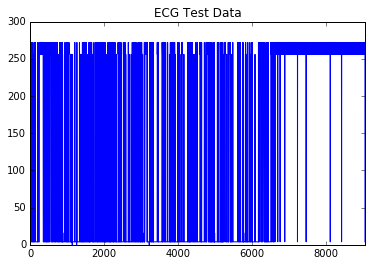

In [25]:
data.C2.plot(legend=False, title="ECG Test Data", color='blue')

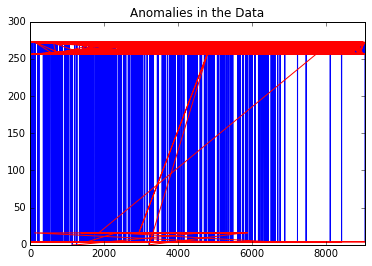

In [29]:
# ax = data.T.plot(legend=False, color='blue')
data.C2.plot(legend=False, color='blue')

# data.C2[anomalies.index].plot(legend=False, title="Anomalies in the Data", color='red', ax=ax);
data.C2[anomalies.index].plot(legend=False, title="Anomalies in the Data", color='red');
# data.keys()
# train_ecg[2].as_data_frame().plot(legend=False, title="ECG Anomalies in the Data", color='red', ax=ax)
# data.C2.keys
# data.C2[1].plot(legend=False, title="ECG Anomalies in the Data", color='red', ax=ax);

## Conclusions

We used the autoencoding capabilities of H2O to quickly detect time series anomalies using Autoencoders.

## Unsupervised Pre-training with Supervised Fine-Tuning

Sometimes, there is much more unlabeled data than labeled data.
It this case,
it might make sense to train an autoencoder model on the unlabeled data and
then fine-tune the learned model with the available labels.

[TODO](https://github.com/h2oai/h2o-3/blob/master/h2o-r/tests/testdir_algos/deeplearning/runit_deeplearning_stacked_autoencoder_large.R)
[https://github.com/h2oai/h2o-3/blob/master/h2o-py/tests/testdir_algos/deeplearning/pyunit_autoencoderDeepLearning_large.py](https://github.com/h2oai/h2o-3/blob/master/h2o-py/tests/testdir_algos/deeplearning/pyunit_autoencoderDeepLearning_large.py)